In [51]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [52]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [65]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,stratify=y,random_state=1)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [67]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
  mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
  print((label, mean_vecs[label - 1]))

(1, array([ 0.8998, -0.36  ,  0.301 , -0.743 ,  0.4679,  0.9176,  0.9809,
       -0.6287,  0.6403,  0.2018,  0.4958,  0.7642,  1.1697]))
(2, array([-0.9191, -0.3613, -0.367 ,  0.2926, -0.4362, -0.1187,  0.0098,
        0.1098, -0.0235, -0.8556,  0.372 ,  0.2343, -0.7699]))
(3, array([ 0.2748,  0.9947,  0.1821,  0.4798,  0.0796, -0.9602, -1.2334,
        0.6148, -0.7599,  1.0456, -1.1796, -1.3044, -0.2868]))


In [68]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [74]:
d = 13  
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [70]:
mean_overall = np.mean(X_train_std, axis=0)
print(mean_overall)
d = 13 
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1)  # make column vector
  mean_overall = mean_overall.reshape(d, 1)  # make column vector
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)


[ 6.3683e-15 -1.4182e-15  4.3688e-15 -5.9272e-16  3.8052e-16  8.5236e-16
  1.0028e-16 -5.4079e-16 -8.1834e-16  1.9698e-17 -1.6474e-15  3.5276e-16
 -3.5366e-17]


##Selecting linear discriminants for the new feature subspace

In [71]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [72]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


In [73]:
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

396.21161595354454
183.91418094236477
5.346535464128302e-14
3.0556213131885835e-14
1.6967023884468637e-14
1.6967023884468637e-14
1.486107876431429e-14
1.4614593351195735e-14
1.4614593351195735e-14
8.289335158988057e-15
8.289335158988057e-15
3.2146234890607754e-15
0.0


In [61]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


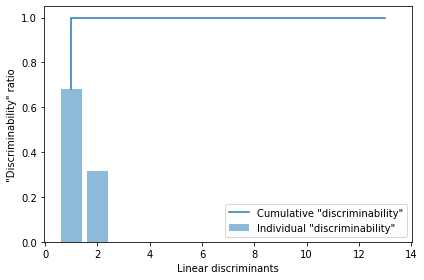

In [62]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5,
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_var_exp,
         label='Cumulative "discriminability"')
plt.plot()
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [63]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,eigen_pairs[1][1][:, np.newaxis].real))
w

array([[-0.1404, -0.4202],
       [ 0.0602, -0.1217],
       [ 0.006 , -0.3427],
       [ 0.2332,  0.273 ],
       [-0.012 , -0.0278],
       [ 0.1879, -0.0886],
       [-0.7472,  0.4535],
       [-0.0916,  0.1452],
       [ 0.014 ,  0.0678],
       [ 0.286 , -0.2229],
       [-0.1073,  0.2107],
       [-0.3536, -0.0019],
       [-0.3188, -0.5316]])

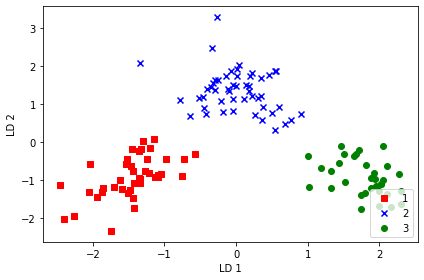

In [80]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()


In [81]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.002):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
 
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  #print(Z)
  plt.contourf(xx1, xx2, Z, alpha=0.3)
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

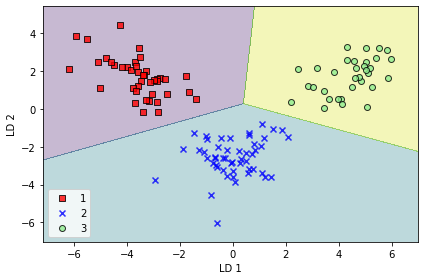

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

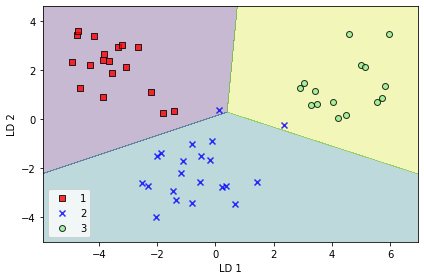

In [92]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()

#LDA via scikit-learn

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda_1 = lda.fit_transform(X_train_std, y_train)

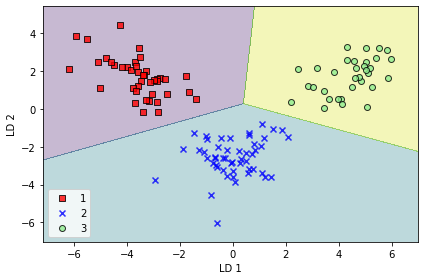

In [89]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda_1, y_train)

plot_decision_regions(X_train_lda_1, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()


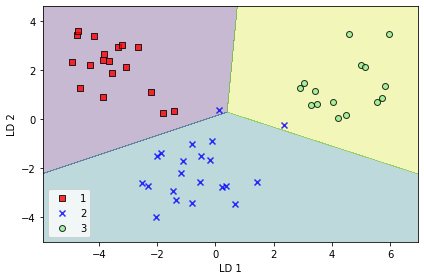

In [91]:
X_test_lda_1 = lda.transform(X_test_std)

plot_decision_regions(X_test_lda_1, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()